In [7]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import numpy as np

customers_df=pd.read_csv('/content/Customers.csv')
products_df =pd.read_csv('/content/Products.csv')
transactions_df=pd.read_csv('/content/Transactions.csv')
merged_data = pd.merge(transactions_df,customers_df, on='CustomerID')




,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,CustomerName,Region,SignupDate
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15
...,...,...,...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86,Jacob Holt,South America,2022-01-22
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86,Mrs. Kimberly Wright,North America,2024-04-07
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86,Tyler Haynes,North America,2024-09-21
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86,Joshua Hamilton,Asia,2024-11-11


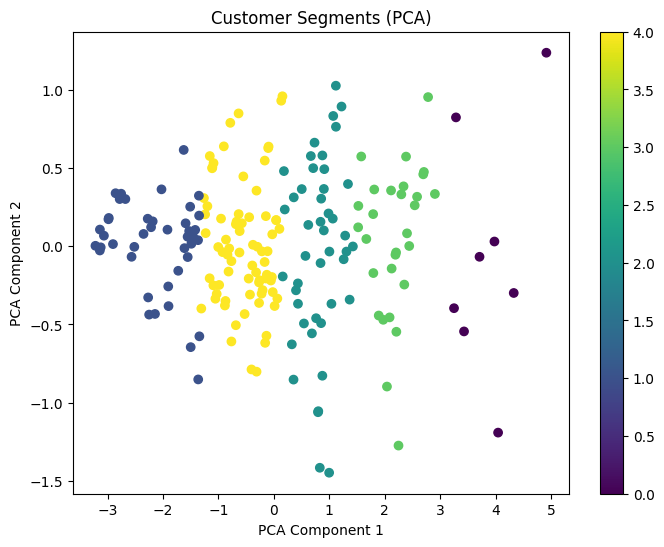

Number of Clusters: 5
DB Index: 0.8967286185530712
Silhouette Score: 0.3605519306620684


In [9]:


# Step 3: Feature Engineering
# Aggregate transaction data
customer_data = merged_data.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'Quantity': 'sum',
    'TransactionDate': 'nunique'
}).reset_index()

# Add customer profile features
customer_data = pd.merge(customer_data,
customers_df[['CustomerID', 'Region']], on='CustomerID')

# Step 4: Feature Scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_data[['TotalValue', 'Quantity', 'TransactionDate']])

# Step 5: Clustering
# Choose the number of clusters (2 to 10)
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add cluster labels to the data
customer_data['Cluster'] = clusters

# Step 6: Evaluation Metrics
# DB Index
db_index = davies_bouldin_score(scaled_data, clusters)

# Silhouette Score
silhouette = silhouette_score(scaled_data, clusters)

# Step 7: Visualizations
# PCA for visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

# Plot clusters
plt.figure(figsize=(8,6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=clusters, cmap='viridis')
plt.title('Customer Segments (PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar()
plt.show()

# Step 8: Report Generation
print(f"Number of Clusters: {5}")
print(f"DB Index: {db_index}")
print(f"Silhouette Score: {silhouette}")